In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns




In [104]:
data = pd.read_csv("WineDataset.csv")
data

Alcohol  Malic Acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      12.20        3.03  2.32               19.0       96.0           1.25   
1      12.77        2.39  2.28               19.5       86.0           1.39   
2      14.16        2.51  2.48               20.0       91.0           1.68   
3      13.71        5.65  2.45               20.5       95.0           1.68   
4      13.40        3.91  2.48               23.0      102.0           1.80   
..       ...         ...   ...                ...        ...            ...   
173    13.73        4.36  2.26               22.5       88.0           1.28   
174    13.45        3.70  2.60               23.0      111.0           1.70   
175    12.82        3.37  2.30               19.5       88.0           1.48   
176    13.58        2.58  2.69               24.5      105.0           1.55   
177    13.40        4.60  2.86               25.0      112.0           1.98   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0          0.49                  0.40             0.73         5.500000  0.66   
1          0.51                  0.48             0.64         9.899999  0.57   
2          0.70                  0.44             1.24         9.700000  0.62   
3          0.61                  0.52             1.06         7.700000  0.64   
4          0.75                  0.43             1.41         7.300000  0.70   
..          ...                   ...              ...              ...   ...   
173        0.47                  0.52             1.15         6.620000  0.78   
174        0.92                  0.43             1.46        10.680000  0.85   
175        0.66                  0.40             0.97        10.260000  0.72   
176        0.84                  0.39             1.54         8.660000  0.74   
177        0.96                  0.27             1.11         8.500000  0.67   

     OD280/OD315 of diluted wines  Proline  Wine  
0                            1.83    510.0     3  
1                            1.63    470.0     3  
2                            1.71    660.0     3  
3                            1.74    740.0     3  
4                            1.56    750.0     3  
..                            ...      ...   ...  
173                          1.75    520.0     3  
174                          1.56    695.0     3  
175                          1.75    685.0     3  
176                          1.80    750.0     3  
177                          1.92    630.0     3  

[178 rows x 14 columns]

In [105]:
stats = data.describe()
stats

Alcohol  Malic Acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color intensity         Hue  OD280/OD315 of diluted wines      Proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

             Wine  
count  178.000000  
mean     1.938202  
std      0.775035  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      3.000000

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic Acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    float64
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    float64
 13  Wine 

In [107]:
if not data.isna().any().any():
    print("data is ok")
else:
    print("The number of missing values in each column:")
    data.isna().sum()
    data.dropna(how='any', inplace=True)

data is ok


In [108]:
def label_encode(data):
    for column in data.columns:
        if data[column].dtype == 'object':  
            unique_vals = data[column].unique()  
            val_map = {val: idx for idx, val in enumerate(unique_vals)}  
            data[column] = data[column].map(val_map)  
    return data

data_encoded = label_encode(data.copy())

In [109]:
# Функция для нормализации данных (приведение к диапазону [0, 1])
def min_max_normalize(data):
    for column in data.columns:
        if data[column].dtype in ['float64', 'int64']:  
            min_val = data[column].min()
            max_val = data[column].max()
            if max_val - min_val != 0: 
                data[column] = (data[column] - min_val) / (max_val - min_val)
            else:
                data[column] = 0  
    return data

data_normalized = min_max_normalize(data_encoded.copy())

print("Предварительно обработанные данные:")
print(data_normalized.head())

Предварительно обработанные данные:
    Alcohol  Malic Acid       Ash  Alcalinity of ash  Magnesium  \
0  0.307895    0.452569  0.513369           0.432990   0.282609   
1  0.457895    0.326087  0.491979           0.458763   0.173913   
2  0.823684    0.349802  0.598930           0.484536   0.228261   
3  0.705263    0.970356  0.582888           0.510309   0.271739   
4  0.623684    0.626482  0.598930           0.639175   0.347826   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0       0.093103    0.031646              0.509434         0.100946   
1       0.141379    0.035865              0.660377         0.072555   
2       0.241379    0.075949              0.584906         0.261830   
3       0.241379    0.056962              0.735849         0.205047   
4       0.282759    0.086498              0.566038         0.315457   

   Color intensity       Hue  OD280/OD315 of diluted wines   Proline  Wine  
0         0.360068  0.146341                      0.20512

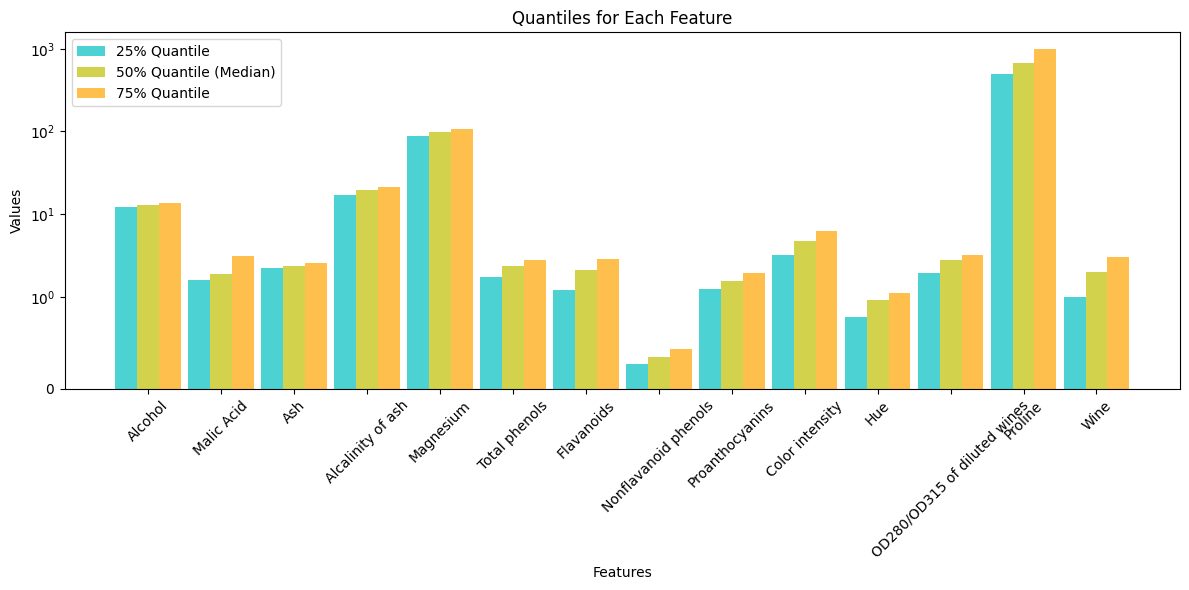

In [110]:
# Квантили 25%, 50% (медиана), 75%
q25_values = stats.loc['25%']
q50_values = stats.loc['50%']
q75_values = stats.loc['75%']

index = np.arange(len(q25_values))  # Делаем индекс на основе количества квантилей

bar_width = 0.3  # Ширина бара

# Визуализация квартилей
plt.figure(figsize=(12, 6))
plt.bar(index, q25_values, bar_width, label='25% Quantile', alpha=0.7, color='c')
plt.bar(index + bar_width, q50_values, bar_width, label='50% Quantile (Median)', alpha=0.7, color='y')
plt.bar(index + 2 * bar_width, q75_values, bar_width, label='75% Quantile', alpha=0.7, color='orange')

plt.yscale('symlog', linthresh=1)  # Логарифмическая шкала с линейным участком при малых значениях
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Quantiles for Each Feature')
plt.xticks(index + bar_width, q25_values.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [111]:
quantiles = data.quantile([0.25, 0.50, 0.75])
print("Квантили для каждого столбца (25%, 50%, 75%):")
print(quantiles)

Квантили для каждого столбца (25%, 50%, 75%):
      Alcohol  Malic Acid     Ash  Alcalinity of ash  Magnesium  \
0.25  12.3625      1.6025  2.2100               17.2       88.0   
0.50  13.0500      1.8650  2.3600               19.5       98.0   
0.75  13.6775      3.0825  2.5575               21.5      107.0   

      Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0.25         1.7425       1.205                0.2700            1.250   
0.50         2.3550       2.135                0.3400            1.555   
0.75         2.8000       2.875                0.4375            1.950   

      Color intensity     Hue  OD280/OD315 of diluted wines  Proline  Wine  
0.25             3.22  0.7825                        1.9375    500.5   1.0  
0.50             4.69  0.9650                        2.7800    673.5   2.0  
0.75             6.20  1.1200                        3.1700    985.0   3.0  


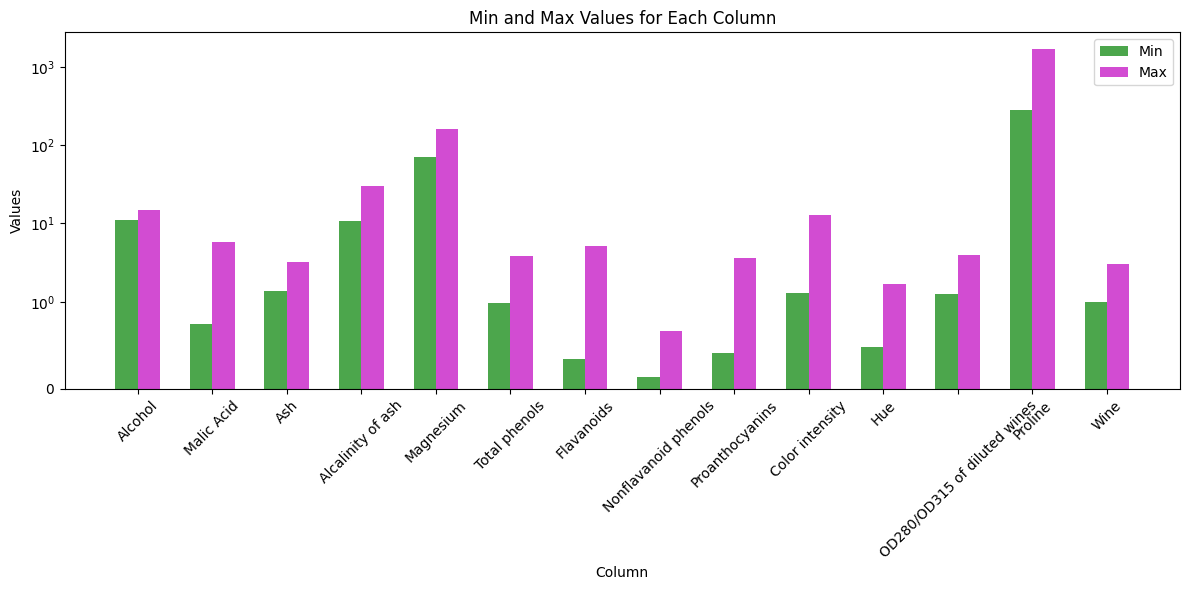

In [112]:
# Минимум и максимум
min_values = stats.loc['min']
max_values = stats.loc['max']

# Визуализация минимума и максимума
plt.figure(figsize=(12, 6))
plt.bar(index, min_values, bar_width, label='Min', alpha=0.7, color='g')
plt.bar(index + bar_width, max_values, bar_width, label='Max', alpha=0.7, color='m')

plt.yscale('symlog', linthresh=1)  # Логарифмическая шкала с линейным участком при малых значениях
plt.xlabel('Column')
plt.ylabel('Values')
plt.title('Min and Max Values for Each Column')
plt.xticks(index + bar_width / 2, min_values.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [113]:
print("Minimum values for each column:")
print(min_values)


Minimum values for each column:
Alcohol                          11.03
Malic Acid                        0.74
Ash                               1.36
Alcalinity of ash                10.60
Magnesium                        70.00
Total phenols                     0.98
Flavanoids                        0.34
Nonflavanoid phenols              0.13
Proanthocyanins                   0.41
Color intensity                   1.28
Hue                               0.48
OD280/OD315 of diluted wines      1.27
Proline                         278.00
Wine                              1.00
Name: min, dtype: float64


In [114]:
print("\nMaximum values for each column:")
print(max_values)


Maximum values for each column:
Alcohol                           14.83
Malic Acid                         5.80
Ash                                3.23
Alcalinity of ash                 30.00
Magnesium                        162.00
Total phenols                      3.88
Flavanoids                         5.08
Nonflavanoid phenols               0.66
Proanthocyanins                    3.58
Color intensity                   13.00
Hue                                1.71
OD280/OD315 of diluted wines       4.00
Proline                         1680.00
Wine                               3.00
Name: max, dtype: float64


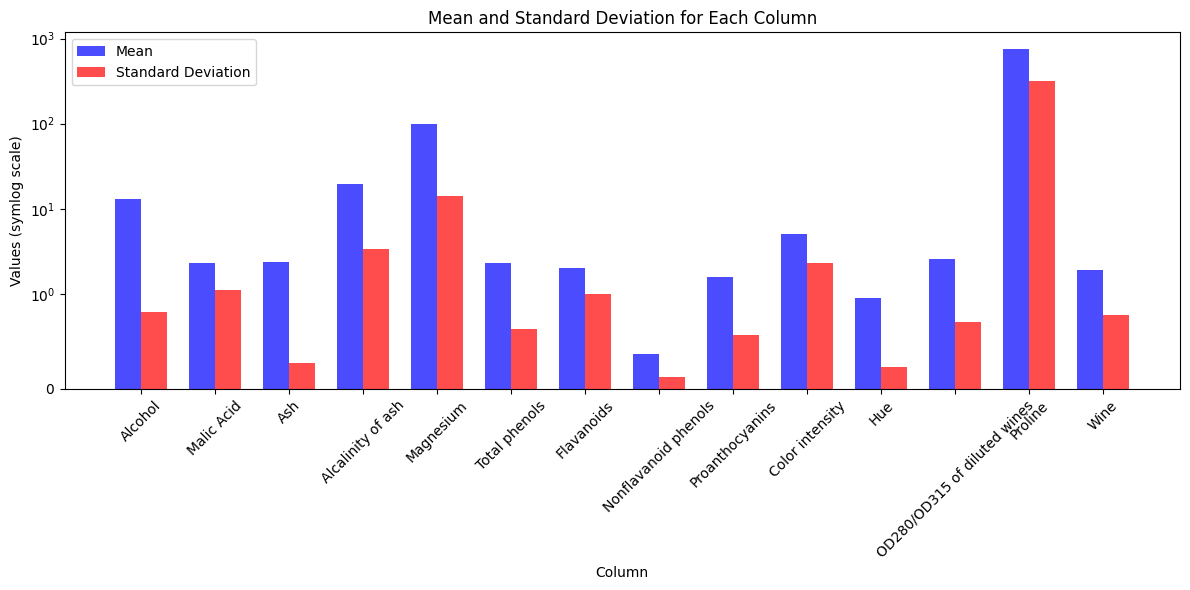

In [115]:
# Среднее значение и стандартное отклонение
mean_values = stats.loc['mean']
std_values = stats.loc['std']

# Визуализация среднего значения и стандартного отклонения с симметричной логарифмической шкалой
plt.figure(figsize=(12, 6))
index = np.arange(len(mean_values))
bar_width = 0.35

plt.bar(index, mean_values, bar_width, label='Mean', alpha=0.7, color='b')
plt.bar(index + bar_width, std_values, bar_width, label='Standard Deviation', alpha=0.7, color='r')

# Симметричная логарифмическая шкала для оси Y
plt.yscale('symlog', linthresh=1)  # Логарифмическая шкала с линейным участком при малых значениях
plt.xlabel('Column')
plt.ylabel('Values (symlog scale)')
plt.title('Mean and Standard Deviation for Each Column')
plt.xticks(index + bar_width / 2, mean_values.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


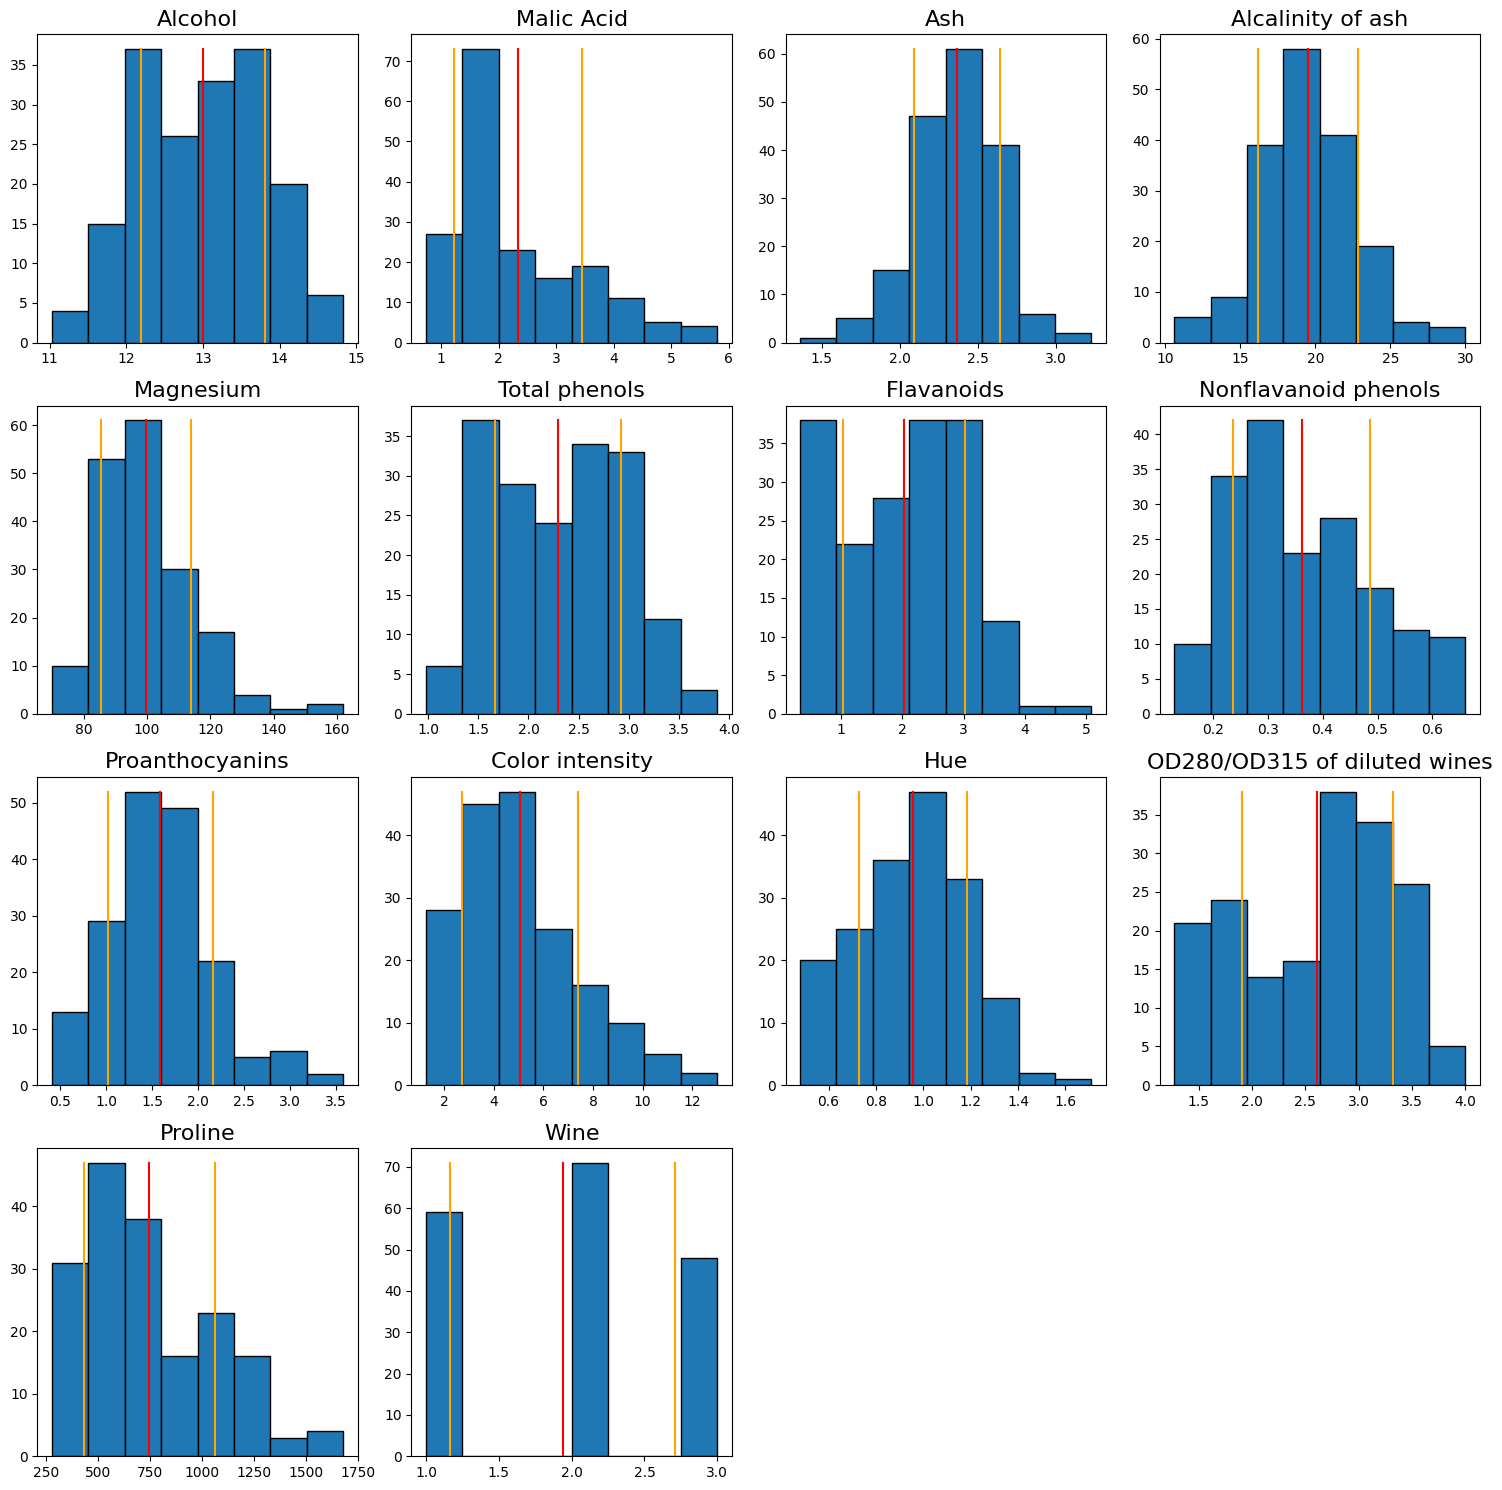

In [116]:
rows_count = data.shape[0] 
cols_count = data.shape[1]

means = data.mean()
corrected_dispersions = np.sum(np.power(data - means, 2)) / (rows_count - 1)
std_offsets = np.sqrt(corrected_dispersions)


bins_count = 1 + int(math.log(rows_count, 2)) #стeрджес

titles = data.columns
fig = plt.figure(figsize=(15, 15))

for i, column in enumerate(titles):
  ax = fig.add_subplot(4, 4, i + 1)
  hist = ax.hist(data[column], bins = bins_count, edgecolor = "black")
  ax.plot([means.iloc[i], means.iloc[i]], [0, np.max(hist[0])], color = "red")
  ax.plot([means.iloc[i] - std_offsets.iloc[i], means.iloc[i] - std_offsets.iloc[i]], [0, np.max(hist[0])], color = "orange")
  ax.plot([means.iloc[i] + std_offsets.iloc[i], means.iloc[i] + std_offsets.iloc[i]], [0, np.max(hist[0])], color = "orange")

  ax.set_title(titles[i], fontsize=16)

fig.tight_layout()
plt.show()

In [117]:
print("Average values for each column:")
print(mean_values)
print("\nThe standard deviation for each column:")
print(std_values)

Average values for each column:
Alcohol                          13.000618
Malic Acid                        2.336348
Ash                               2.366517
Alcalinity of ash                19.494944
Magnesium                        99.741573
Total phenols                     2.295112
Flavanoids                        2.029270
Nonflavanoid phenols              0.361854
Proanthocyanins                   1.590899
Color intensity                   5.058090
Hue                               0.957449
OD280/OD315 of diluted wines      2.611685
Proline                         746.893258
Wine                              1.938202
Name: mean, dtype: float64

The standard deviation for each column:
Alcohol                           0.811827
Malic Acid                        1.117146
Ash                               0.274344
Alcalinity of ash                 3.339564
Magnesium                        14.282484
Total phenols                     0.625851
Flavanoids                        0.9988

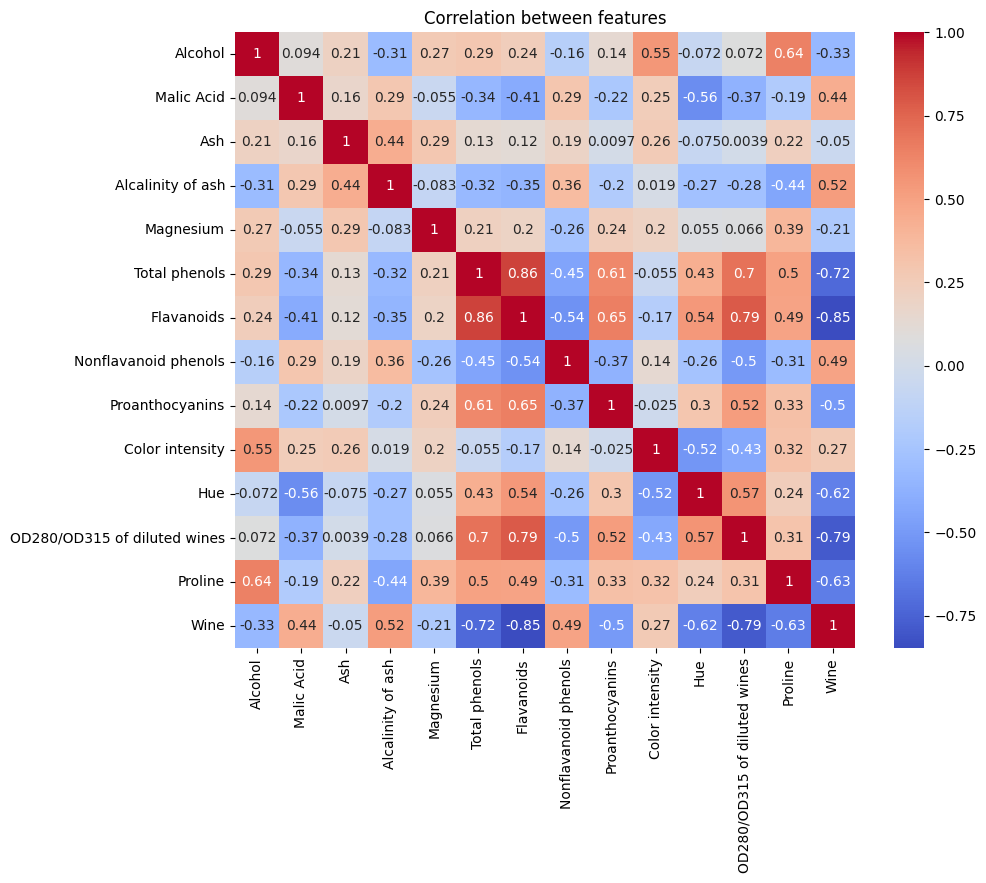

In [118]:

# Тепловая карта корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between features')
plt.show()

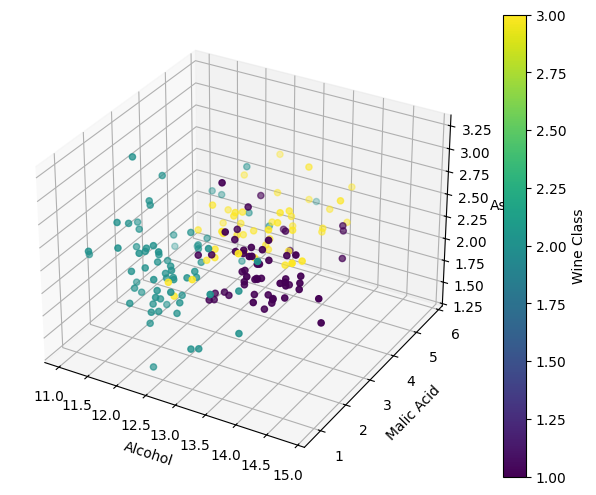

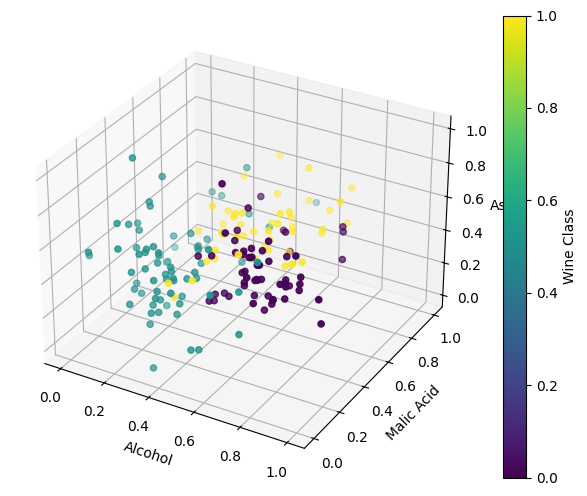

In [119]:
def plot_3d_features(x, y, z, labels):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Визуализация точек с цветовой картой в зависимости от меток классов
    scatter = ax.scatter(x, y, z, c=labels, cmap='viridis')

    ax.set_xlabel('Alcohol')
    ax.set_ylabel('Malic Acid')
    ax.set_zlabel('Ash')

    legend = plt.colorbar(scatter)
    legend.set_label('Wine Class')

    plt.show()

x = data['Alcohol']     
y = data['Malic Acid']  
z = data['Ash']         
labels = data['Wine']
plot_3d_features(x, y, z, labels)

x = data_normalized['Alcohol']     
y = data_normalized['Malic Acid']  
z = data_normalized['Ash']         
labels = data_normalized['Wine']
plot_3d_features(x, y, z, labels)

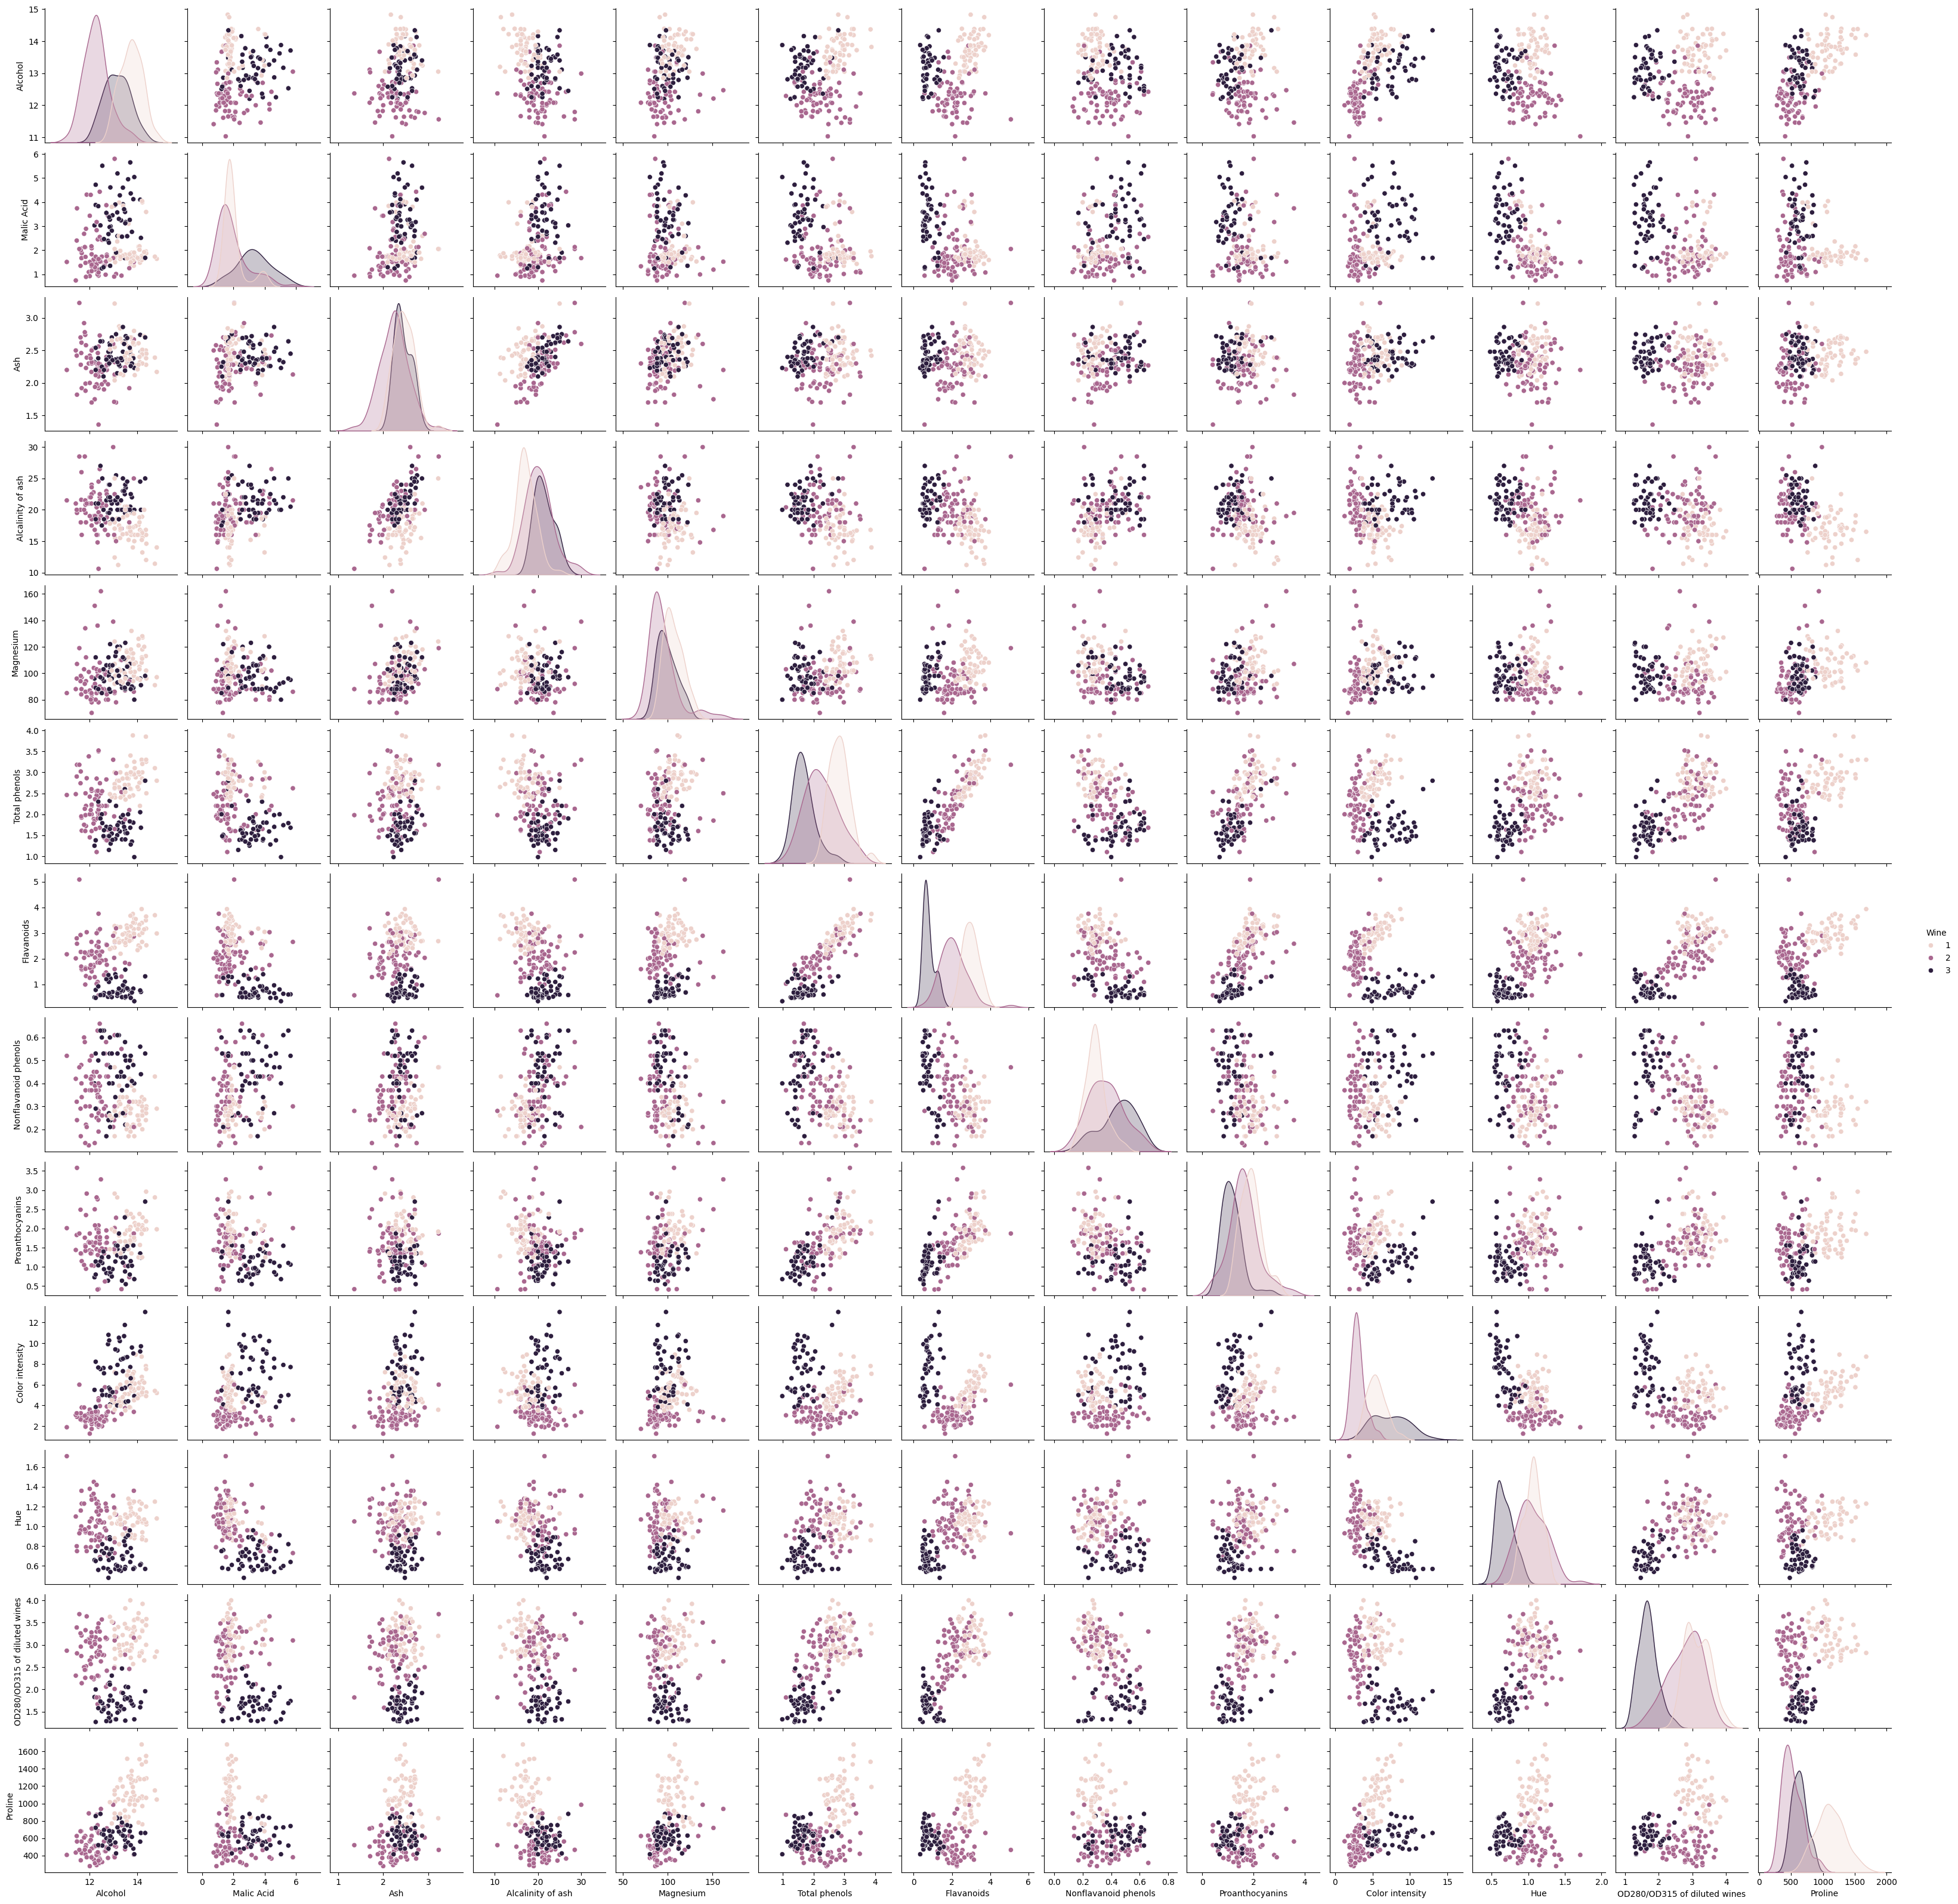

In [121]:
sns.pairplot(data, hue="Wine")
